<a href="https://colab.research.google.com/github/yualapshina/nana/blob/main/nana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
from enum import IntEnum, auto
from copy import deepcopy
from itertools import chain
import matplotlib.pyplot as plt
import numpy as np

# structures

In [84]:
class State(IntEnum):
  FULL = auto()
  EMPTY = auto()
  ACTIVE = auto()

In [85]:
class Line:

  def __init__(self, size, start, finish, index, content=[]):
    self.size = size
    self.start = start
    self.finish = finish
    self.index = index
    self.content = deepcopy(content)

  def fill_from_field(self, field):
    count = 0
    xs, ys = self.init_coords()
    for x, y in zip(xs, ys):
      cell = field[x][y]
      if cell == State.FULL:
        count += 1
      elif count:
        self.content.append(count)
        count = 0
    if count:
      self.content.append(count)

  def len(self):
    return self.finish - self.start + 1

  def sum(self):
    return sum(self.content) + len(self.content) - 1

  def n(self):
    return len(self.content)

  def __str__(self):
    return str(self.index) + ': ' + str(self.start) + ' - ' \
    + str(self.content)+ ' - ' + str(self.finish)

  def init_coords(self):
    pass

  def coords(self, x):
    pass

In [86]:
class LineLeft(Line):

  def init_coords(self):
    return [self.index] * self.size, range(self.size)

  def coords(self, x):
    return self.index, x

class LineRight(Line):

  def init_coords(self):
    return [self.index] * self.size, range(self.size-1, -1, -1)

  def coords(self, x):
    return self.index, self.size - x - 1

class LineTop(Line):

  def init_coords(self):
    return range(self.size), [self.index] * self.size

  def coords(self, x):
    return x, self.index

class LineBottom(Line):

  def init_coords(self):
    return range(self.size-1, -1, -1), [self.index] * self.size

  def coords(self, x):
    return self.size - x - 1, self.index

In [87]:
class Puzzle:

  def __init__(self, size, pattern=None, density=0.5):
    self.size = size
    self.field = []
    if pattern:
      self.fill_pattern(pattern)
    else:
      self.fill_random(density)
    self.parse()

  def fill_pattern(self, pattern):
    assert(len(pattern) == self.size)
    for r in pattern:
      row = []
      for c in r:
        row.append(State.FULL if c else State.EMPTY)
      self.field.append(row)

  def fill_random(self, density):
    for i in range(self.size):
      row = []
      for j in range(self.size):
        row.append(np.random.choice((State.FULL, State.EMPTY), p=[density, 1-density]))
      self.field.append(row)

  def parse(self):
    self.bar_left = []
    self.bar_right = []
    self.bar_top = []
    self.bar_bottom = []
    for i in range(self.size):
      self.bar_left.append(LineLeft(self.size, 0, self.size-1, i))
      self.bar_right.append(LineRight(self.size, 0, self.size-1, i))
      self.bar_top.append(LineTop(self.size, 0, self.size-1, i))
      self.bar_bottom.append(LineBottom(self.size, 0, self.size-1, i))

    for line in self.allbars():
      line.fill_from_field(self.field)

  def clean(self):
    for i in range(self.size):
      for j in range(self.size):
        self.field[i][j] = State.ACTIVE

  def allbars(self):
    return chain(self.bar_left, self.bar_right, self.bar_top, self.bar_bottom)

  def print_bars(self):
    print('left')
    for line in self.bar_left:
      print(line)
    print('right')
    for line in self.bar_right:
      print(line)
    print('top')
    for line in self.bar_top:
      print(line)
    print('bottom')
    for line in self.bar_bottom:
      print(line)

# graphics

In [88]:
background = {'dark': '#383838', 'light': '#f5e7a3'}
main = {'dark': '#f5e7a3', 'light': '#383838'}
grid = {'dark': 'black', 'light': 'white'}
marker = {'dark': '#ff79bc', 'light': '#ff79bc'}
marker_font = {'dark': 'black', 'light': 'black'}

In [89]:
class Graphic:
  def __init__(self, cmap='dark', zoom=0.5, grid=5):
      self.cmap = cmap
      self.zoom = zoom
      self.grid = grid

  def draw_field(self, puzzle):
    fig = plt.figure(
        figsize=(puzzle.size * self.zoom, puzzle.size * self.zoom),
        facecolor=background[self.cmap])
    ax = plt.axes()
    ax.set_facecolor(background[self.cmap])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    grid_size = puzzle.size + 1
    for i in range(grid_size):
      plt.plot(range(grid_size), [i] * grid_size, color=grid[self.cmap], linewidth=1)
      plt.plot([i] * grid_size, range(grid_size), color=grid[self.cmap], linewidth=1)
      if (not i % self.grid) or (i == puzzle.size):
        plt.plot(range(grid_size), [i] * grid_size, color=grid[self.cmap], linewidth=2)
        plt.plot([i] * grid_size, range(grid_size), color=grid[self.cmap], linewidth=2)

    for i in range(puzzle.size):
      for j in range(puzzle.size):
        x = j + 0.5
        y = puzzle.size - i - 0.5
        if puzzle.field[i][j] == State.FULL:
          plt.scatter(x, y, s=(35 * self.zoom) ** 2, c=main[self.cmap], marker='s')
        if puzzle.field[i][j] == State.EMPTY:
          plt.scatter(x, y, s=(10 * self.zoom) ** 2, c=main[self.cmap], marker='.')

    plt.show()

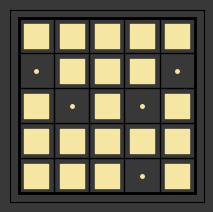

left
0: 0 - [5] - 4
1: 0 - [3] - 4
2: 0 - [1, 1, 1] - 4
3: 0 - [5] - 4
4: 0 - [3, 1] - 4
right
0: 0 - [5] - 4
1: 0 - [3] - 4
2: 0 - [1, 1, 1] - 4
3: 0 - [5] - 4
4: 0 - [1, 3] - 4
top
0: 0 - [1, 3] - 4
1: 0 - [2, 2] - 4
2: 0 - [5] - 4
3: 0 - [2, 1] - 4
4: 0 - [1, 3] - 4
bottom
0: 0 - [3, 1] - 4
1: 0 - [2, 2] - 4
2: 0 - [5] - 4
3: 0 - [1, 2] - 4
4: 0 - [3, 1] - 4


In [90]:
pattern = [
  [0, 0, 1, 0, 0],
  [0, 0, 1, 1, 0],
  [1, 1, 1, 1, 1],
  [1, 0, 1, 0, 0],
  [1, 1, 1, 0, 0],
]

puzzle = Puzzle(size=5, density=0.7)

graphic = Graphic(cmap='dark', zoom=0.5, grid=5)
graphic.draw_field(puzzle)
puzzle.print_bars()